In [1]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 15 Demo

In [2]:
n_students = 100
share_second = 0.6
share_third = 0.4
share_second_declared = 0.5
share_third_declared = 0.8

students = Table().with_columns('year', np.append(np.repeat('second', n_students*share_second), 
                                                  np.repeat('third', n_students*share_third)),
                                'declared', np.append(np.append(np.repeat('yes', round(n_students*share_second*share_second_declared)), 
                                                                np.repeat('no',  round(n_students*share_second*(1-share_second_declared)))),
                                                      np.append(np.repeat('yes', round(n_students*share_third*share_third_declared)), 
                                                                np.repeat('no',  round(n_students*share_third*(1-share_third_declared))))))

In [3]:
students.pivot('declared', 'year')

year,no,yes
second,30,30
third,8,32


## Bayes rule

In [3]:
def bayes_rule(pr_a, pr_b_given_a, pr_b_given_not_a):
    """
    Bayes' Rule
    P(A | B) = P(A)P(B|A) / P(B)
    
    To Compute P(B)
        P(B) = P(B, A) + P(B, Not A) 
             = P(A)P(B|A) + P(Not A)P(B | Not A)
    """
    prb_b = pr_a * pr_b_given_a + (1-pr_a) * pr_b_given_not_a
    return pr_a * pr_b_given_a / prb_b

In [4]:
pr_disease = 1/1000
pr_pos_given_disease = 0.99
pr_pos_given_no_disease = 0.05

bayes_rule(pr_disease, pr_pos_given_disease, pr_pos_given_no_disease)

0.019434628975265017

In [7]:
pr_disease = 0.1 # updated here to a more common disease 1/10 people contract the disease
pr_pos_given_disease = 0.99
pr_pos_given_no_disease = 0.05

bayes_rule(pr_disease, pr_pos_given_disease, pr_pos_given_no_disease)
# if the prevalence of the disease is greater, a more common contagious disease (think cold/flu)
# then the probability you have the disease if you test positive, is much greater ~ 69%

# as opposed to up above where we had a rarer disease, the probability of you having the disease, when you test positive is only 2%

0.6875

## Getting Confident Quickly

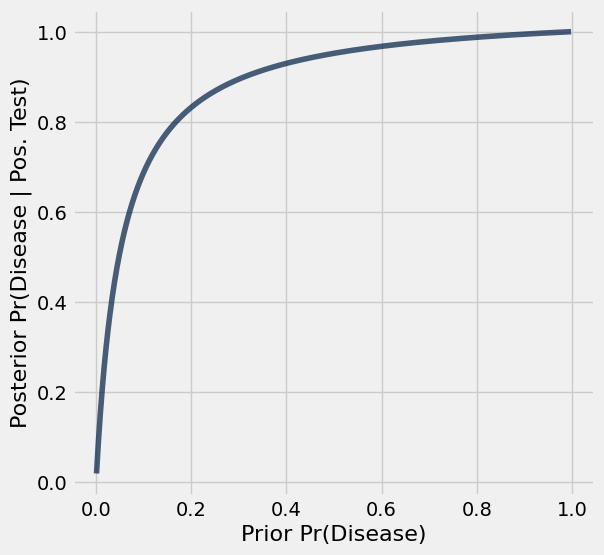

In [8]:
pr_disease = np.arange(1,999)/1000
pr_pos_given_disease = 0.99
pr_pos_given_no_disease = 0.05

post = bayes_rule(pr_disease, pr_pos_given_disease, pr_pos_given_no_disease)
Table().with_columns(
    "Prior Pr(Disease)", pr_disease, 
    "Posterior Pr(Disease | Pos. Test)", post).plot("Prior Pr(Disease)")

In [5]:
# prevalence of Teslas
prev_tesla = 1/100
pr_speed_tesla = 1/100
prev_tesla * pr_speed_tesla
# 0.01% chance my tesla is pulled over for speeding

0.0001

In [6]:
# prevalence of lamborghinis
prev_lamb = 1/10_000
pr_speed_lamb = 3/10
prev_lamb * pr_speed_lamb
# 0.00003 ->0.003% chance my lambo is pulled over for speeding

3e-05